# Movie Analysis Project Phase 4
### Table of Contents
### 1. Overview
Movie streaming has recently gained a lot of traction and the company 'Box O' Movies', wants to switch gears and change their business from selling movies to streaming. Their current goal is to make sure their customers are getting accurate recommendations to movies that they will enjoy. They have tasked my team, from Dohn Co., to create a recommendation system or push them in the right direction that will be able to connect their members to precisely the type of movies that they might enjoy.
### 2. Business Problem
Box O' Movies started off as store meant for the in store selling of movies, but as Covid-19 struck the US, they were losing customers. This action led them to the decision is switch into becoming a streaming service. As they our trying to finish this quickly before their company loses too much money, they are desperately searching for a accurate recommendation system to make the people choose to use their service. 

Due to their service barely breaking the water's surface, my team decided to use data from the MovieLens dataset from the GroupLens research lab at the University of Minnesota. This will give us the necessary information needed to build a recommendation system that Box O' Movies will be able to adjust and use to their advantage.
### 3. Data Understanding
First, we have to import the necessary packages and along with the datasets we will be using.

In [80]:
#import the necessary packages
import pandas as pd
import numpy as np
import requests
import re
import bleach
from time import sleep
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

#### CSV into Pandas Dataframe
As you can see there are four datasets, but we will only be focusing on movies and ratings. Also, something mentionable to include is that when printing 'movieId', it shows that there are 9742, but with the titles there are 9737. This can indicate that there might be 5 of the same movie titles. When then can see that there are 610 users who rated these movies.

In [81]:
links_df = pd.read_csv('data/links.csv')
movies_df = pd.read_csv('data/movies.csv')
ratings_df = pd.read_csv('data/ratings.csv')
tags_df = pd.read_csv('data/tags.csv')

In [82]:
print(movies_df['movieId'].nunique())
print(movies_df['title'].nunique())

9742
9737


In [151]:
print("Number of users: ", ratings_df.userId.nunique())
print("Number of movies: ", ratings_df.movieId.nunique())

Number of users:  610
Number of movies:  9724


#### Overall Data Exploration
When looking at the movies dataset, we can see that there are 9742 movies in the dataset itself along with no missing values. The data is split into three columns with the first being the movie ID, the second with the title/year, and finally the genres.

In [83]:
print(movies_df)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [147]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [145]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [85]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


With the ratings data, we can see that there are over 100,000 ratings also with no missing values and are split in four columns first with the user ID, second with the movie ID, third with the rating, and lastly with the timestamp. We then have a histogram of the ratings, which seems to show a lot of them are pretty high leading to a left skew.

In [87]:
print(ratings_df)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]


In [88]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [148]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


<AxesSubplot:>

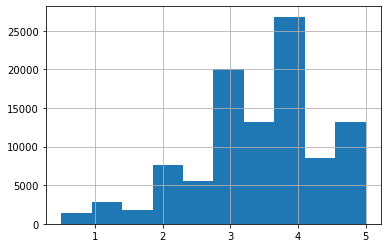

In [150]:
ratings_df['rating'].hist()

#### Modeling
Our team use Surprise Library machine learning in order to go about our modeling. We will be using RMSE to compare how each model compares, because it is vital for prediction and is a measure of best fit. (The lower the RMSE, the better) 

In [90]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

In [91]:
data = ratings_df[['userId', 'movieId', 'rating']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

trainset, testset= train_test_split(data, test_size=.2)

In [92]:
svd = SVD()
svd.fit(trainset)

In [93]:
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8744


0.8744157663136031

In [94]:
predictions[:10]

[Prediction(uid=448, iid=1171, r_ui=4.0, est=2.615843911899332, details={'was_impossible': False}),
 Prediction(uid=527, iid=1125, r_ui=4.0, est=4.354750497927921, details={'was_impossible': False}),
 Prediction(uid=68, iid=2478, r_ui=4.0, est=3.117488126334042, details={'was_impossible': False}),
 Prediction(uid=140, iid=2077, r_ui=4.0, est=3.3412953670169343, details={'was_impossible': False}),
 Prediction(uid=610, iid=3298, r_ui=4.0, est=3.583165701906697, details={'was_impossible': False}),
 Prediction(uid=477, iid=585, r_ui=0.5, est=3.3886586968289487, details={'was_impossible': False}),
 Prediction(uid=199, iid=2006, r_ui=3.0, est=3.179465886225506, details={'was_impossible': False}),
 Prediction(uid=179, iid=367, r_ui=3.0, est=3.11978720331781, details={'was_impossible': False}),
 Prediction(uid=590, iid=4878, r_ui=3.0, est=3.6417764692189047, details={'was_impossible': False}),
 Prediction(uid=590, iid=1393, r_ui=3.0, est=3.5412138893478673, details={'was_impossible': False})]

The prediction above shows the user's estimated vs actual rating for the movie.

In [97]:
user = 3
item = 59314

svd.predict(user, item)

Prediction(uid=3, iid=59314, r_ui=None, est=2.6355229803400846, details={'was_impossible': False})

In [98]:
accuracy.mae(predictions)

MAE:  0.6717


0.6717126227860686

We will be running more models to compare accuracy amongst eachother while using SVD as our base model.

In [100]:
from surprise import KNNWithMeans

In [101]:
KNNM = KNNWithMeans()
KNNM.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [102]:
KNNMpred = KNNM.test(testset)
accuracy.rmse(KNNMpred)

RMSE: 0.9020


0.9020080534346628

KNNMWithMeans has a higher RMSE than SVD, therefore SVD would be better to use in our case.

In [104]:
from surprise import BaselineOnly

In [105]:
BO = BaselineOnly()
BO.fit(trainset)

Estimating biases using als...


In [106]:
BOpred = BO.test(testset)
accuracy.rmse(BOpred)

RMSE: 0.8757


0.8756919107345132

BaselineOnly had a lower RMSE than SVD, therefore we will keep this model for now.

In [108]:
from surprise import NormalPredictor

In [109]:
NP = NormalPredictor()
NP.fit(trainset)

In [110]:
NPpred = NP.test(testset)
accuracy.rmse(NPpred)

RMSE: 1.4140


1.4139850973458667

NormalPredictor has a very high RMSE, there this model will not be better to use.

In [112]:
from surprise import KNNBaseline

In [113]:
KNNB = KNNBaseline()
KNNB.fit(trainset)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [114]:
KNNBpred = KNNB.test(testset)
accuracy.rmse(KNNBpred)

RMSE: 0.8803


0.880347672319348

KNNBaseline has a slightly higher RMSE than Baseline, so BaselineOnly will still be used at this point.

In [116]:
from surprise import KNNBasic

In [117]:
knnbasic = KNNBasic()
knnbasic.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [118]:
knnbasicpred = knnbasic.test(testset)
accuracy.rmse(knnbasicpred)

RMSE: 0.9530


0.95297788988724

KNNBasic as a higher RMSE, therefore this model will not be used.

In [120]:
from surprise import CoClustering

In [121]:
CC = CoClustering()
CC.fit(trainset)

<ipython-input-121-c3e9bc95a679>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  CC.fit(trainset)


In [122]:
CCpred = CC.test(testset)
accuracy.rmse(CCpred)

RMSE: 0.9478


0.9477532670585308

CoClustering has a higher RMSE, therefore will not be of use.

In [124]:
from surprise import SlopeOne

In [125]:
SO = SlopeOne()
SO.fit(trainset)

<ipython-input-125-23bbd11cc33d>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  SO.fit(trainset)


In [126]:
SOpred = SO.test(testset)
accuracy.rmse(SOpred)

RMSE: 0.9029


0.9029343033957841

SlopeOne also has a higher RMSE and therefore will not be of use. It seems that BaselineOnly seems to be the best model use with the smallest RMSE score of 0.8673 with only KNNBaseline coming near that score. With a score of 0.8673 that the prediction could be 0.8673 above or below the true rating.

In [129]:
final_dataset = ratings_df.pivot(index='movieId', columns='userId', values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
final_dataset.fillna(0, inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


These simply show the user and the ratings they made. Then we just filled the NaN with 0.

In [167]:
data = ratings_df.merge(movies_df, on='movieId')

In [168]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [171]:
#Transform the Data
user_ratings = data.pivot_table(index='userId', columns='title', values='rating')
user_ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Conclusion
Although still in the process of finishing the recommendation model for users, we at least found the best model type from what we tested to use in order to get only 0.86 off the true rating. We would like to research more in order to see if we can get that number even lower. 